In [4]:
import pandas as pd 
import numpy as np


In [5]:
dt = pd.read_csv('spam.csv', encoding='latin1')
dt

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
##1. DATA PREPROCESSING 


In [7]:
dt.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
dt.rename(columns={'v1':'target','v2':'text'},inplace=True)
dt.sample(5)

,target,text
5564,ham,Why don't you wait 'til at least wednesday to ...
5352,ham,Good morning princess! Have a great day!
3279,ham,Badrith is only for chennai:)i will surely pic...
4812,ham,i can call in &lt;#&gt; min if thats ok
4608,ham,Y de asking like this.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dt['target']=encoder.fit_transform(dt['target'])
dt.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
dt.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
dt.duplicated().sum()

np.int64(403)

In [12]:
dt=dt.drop_duplicates(keep='first')
dt.duplicated().sum()

np.int64(0)

In [13]:
dt.shape

(5169, 2)

In [14]:
## 2. EDA

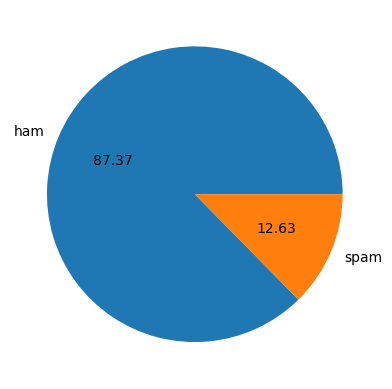

In [15]:
import matplotlib.pyplot as plt 
plt.pie(dt['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()


In [16]:
dt['num_character']=dt['text'].apply(len)  # Count Characters

C:\Users\ranar\AppData\Local\Temp\ipykernel_19508\3938294591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['num_character']=dt['text'].apply(len)  # Count Characters


In [17]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

dt['num_words'] = dt['text'].apply(lambda x: len(tokenizer.tokenize(x)))




C:\Users\ranar\AppData\Local\Temp\ipykernel_19508\1470010835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['num_words'] = dt['text'].apply(lambda x: len(tokenizer.tokenize(x)))


In [18]:
dt

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,33
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [19]:
import re

def count_sentences(text):
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip() != ""]
    return len(sentences)

dt['num_sentences'] = dt['text'].apply(count_sentences)


C:\Users\ranar\AppData\Local\Temp\ipykernel_19508\1043688117.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['num_sentences'] = dt['text'].apply(count_sentences)


In [20]:
dt

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,33,5
5568,0,Will Ì_ b going to esplanade fr home?,37,8,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,10,3
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [21]:
dt[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.989940,2.304508
std,58.236293,11.518372,1.639932
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,23.000000,3.000000
max,910.000000,190.000000,31.000000


In [22]:
dt[dt['target']==0][['num_character','num_words','num_sentences']].describe()  # for ham

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.600974,2.099424
std,56.358207,11.448193,1.510418
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,19.000000,3.000000
max,910.000000,190.000000,31.000000


In [23]:
dt[dt['target']==1][['num_character','num_words','num_sentences']].describe()  # for spam

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,25.595712,3.722818
std,30.137753,6.185684,1.792465
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,27.000000,4.000000
75%,157.000000,29.000000,5.000000
max,224.000000,40.000000,10.000000


In [24]:
import seaborn as sns


<Axes: xlabel='num_character', ylabel='Count'>

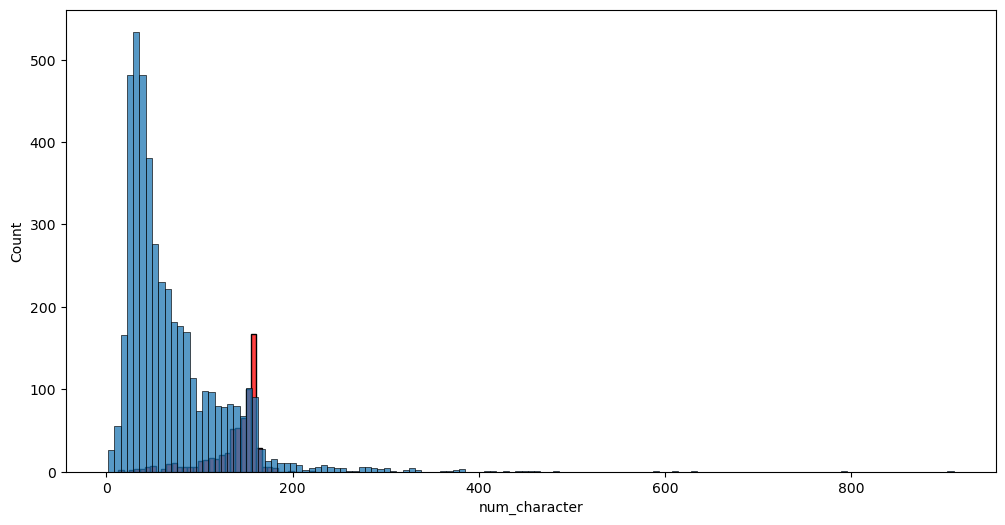

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(dt[dt['target']==1]['num_character'],color='red')
sns.histplot(dt[dt['target']==0]['num_character'])

<Axes: xlabel='num_words', ylabel='Count'>

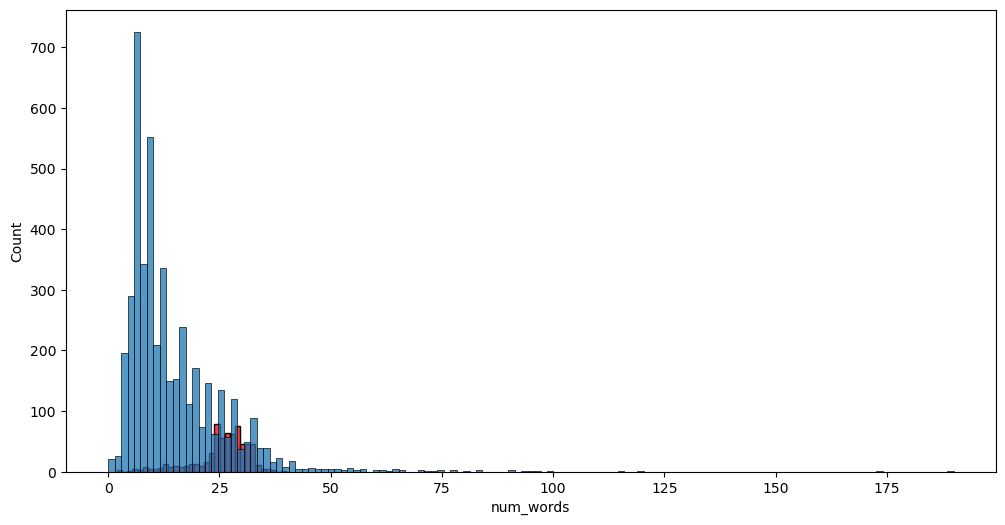

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(dt[dt['target']==1]['num_words'],color='red')
sns.histplot(dt[dt['target']==0]['num_words'])

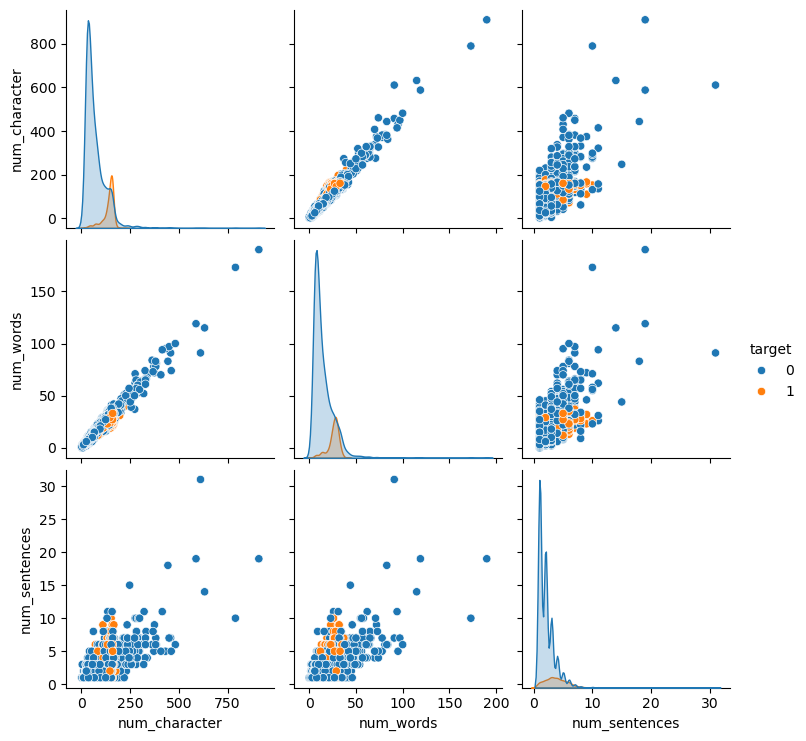

In [27]:
sns.pairplot(dt,hue='target')

<Axes: >

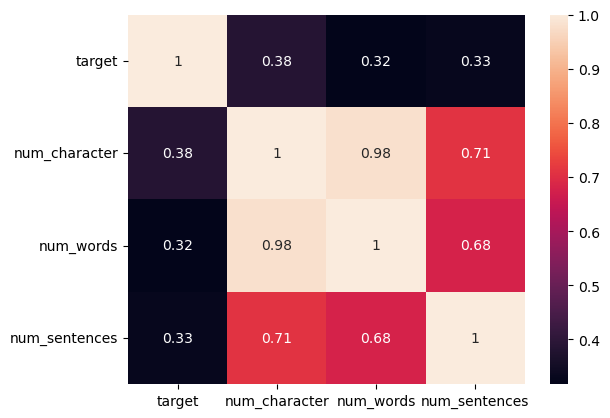

In [28]:
sns.heatmap(dt[['target','num_character','num_words','num_sentences']].corr(),annot=True)

In [29]:
##Text preprocessing 

# 1. lower case
# 2. tokenization
# 3. Remove special character 
# 4. Remove Stop Words 
# 5. stemming 


In [33]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ranar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import string

print(string.punctuation)


def text_transformer(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for  i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
        

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [35]:
dt['Transformed_text']=dt['text'].apply(text_transformer)

C:\Users\ranar\AppData\Local\Temp\ipykernel_19508\2811217154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Transformed_text']=dt['text'].apply(text_transformer)


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=8,background_color='white')


In [ ]:
ham_wc=wc.generate(dt[dt['target'] ==0]['Transformed_text'].str.cat(sep=" "))



In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_wc=wc.generate(dt[dt['target'] ==1]['Transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


In [ ]:
spam_corpus=[]
for msg in dt[dt['target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
df=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word', 'frequency'])

sns.barplot(x='word',y='frequency',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:

ham_corpus=[]
for msg in dt[dt['target']==0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
df=pd.DataFrame(Counter(ham_corpus).most_common(30),columns=['word', 'frequency'])

sns.barplot(x='word',y='frequency',data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
cv=CountVectorizer()
tf=TfidfTransformer()
x=cv.fit_transform(dt['Transformed_text']).toarray()

In [ ]:
x1=tf.fit_transform(dt['Transformed_text']).toarray()

In [ ]:
x.shape

In [ ]:
y=dt['target'].values

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)


In [ ]:
y_pred=gnb.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

In [ ]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


In [ ]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

In [ ]:
#voting
#stacking